# Stock Keeping Unit

**Loading csv files**

In [1]:
SKU1 <- read.csv("data/DATA_2.01_SKU.csv")
head(SKU1)

,ADS,CV
,<int>,<dbl>
1,1,0.68
2,3,0.40
3,1,0.59
4,2,0.39
5,9,0.11
6,2,0.56


**Exploring the file**

In [2]:
str(SKU1)

'data.frame':	100 obs. of  2 variables:
 $ ADS: int  1 3 1 2 9 2 2 8 11 6 ...
 $ CV : num  0.68 0.4 0.59 0.39 0.11 0.56 0.69 0.76 0.96 0.13 ...


In [3]:
summary(SKU1)

      ADS              CV       
 Min.   : 1.00   Min.   :0.050  
 1st Qu.: 2.00   1st Qu.:0.130  
 Median : 3.00   Median :0.400  
 Mean   : 5.61   Mean   :0.396  
 3rd Qu.:10.00   3rd Qu.:0.590  
 Max.   :14.00   Max.   :0.960  

#### Plot the Data

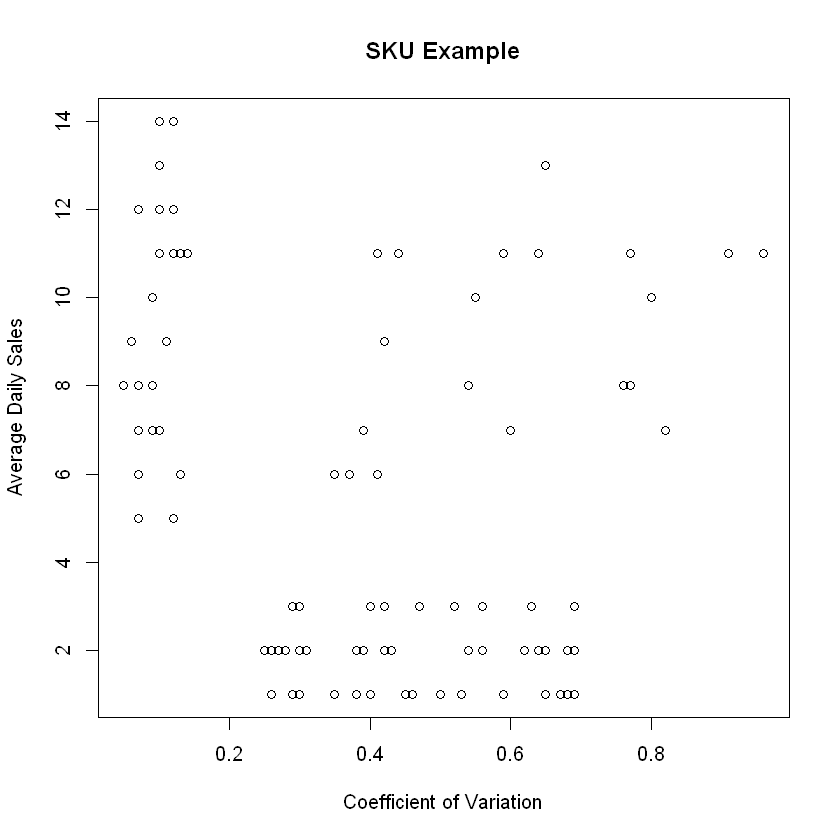

In [4]:
plot(SKU1$CV, SKU1$ADS, main = "SKU Example", ylab="Average Daily Sales", xlab= "Coefficient of Variation")

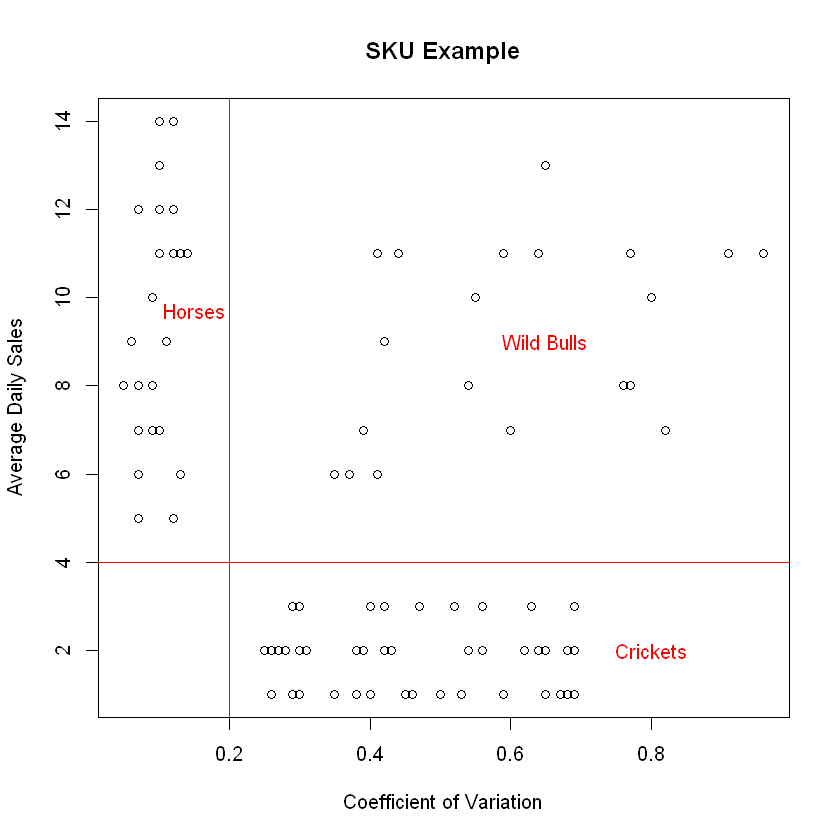

In [5]:
plot(SKU1$CV, SKU1$ADS, main = "SKU Example", ylab="Average Daily Sales", xlab= "Coefficient of Variation")

abline(v=0.2, col = "red") # we can draw a vertical line by using the abline function and passing it the v argument
abline(h=4, col="red") # we can draw a horizontal line by using the abline function and passing it the h argument
text(0.15,9.7, "Horses", col = "red") # we can add some text, here, label the group "Horses"
text(0.65,9, "Wild Bulls", col = "red") # and group "Wild Bulls"
text(0.8,2, "Crickets", col = "red") # and group "Crickets"

#### Let's find groups using hierarchical clustering and check if we obtain similar results.

In [6]:
testdata = SKU1  # To keep our dataset safe, let's create a copy of it called "testdata"
testdata = scale(testdata) # To keep our dataset safe, let's create a copy of it called "testdata"

In [7]:
# the dist() function computes the distances of all the observations in our dataset
d = dist(testdata, method = "euclidean") 

# hclust() function performs hiearchical clustering, we pass it the distances, and we set the method argument to "ward.D"
hcward = hclust(d, method="ward.D") 

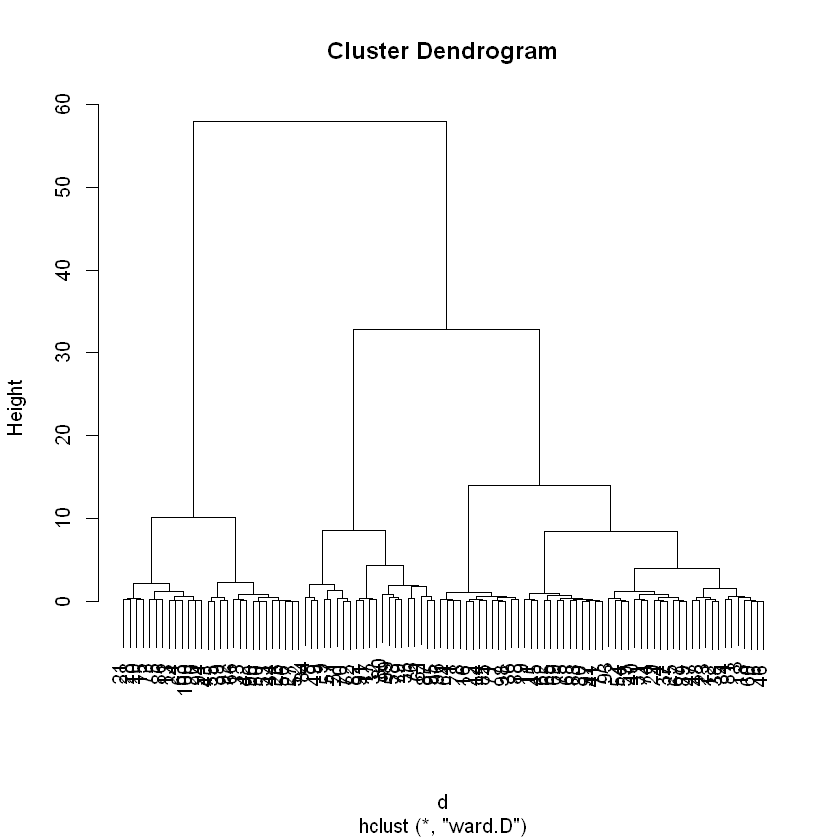

In [8]:
plot(hcward)    # plot dendrogram

In [9]:
SKU1$groups<-cutree(hcward,k=3) # assign our points to our k=3 clusters

In [10]:
# The lattice library provides a complete set of functions for producing advanced plots.
# install.packages("lattice")
library(lattice) 

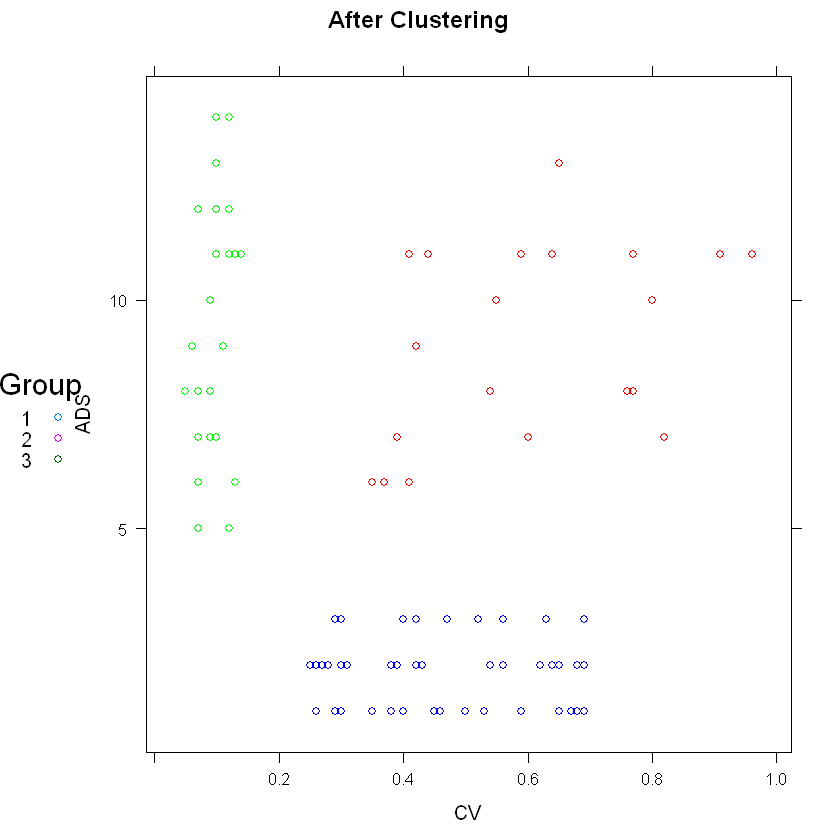

In [11]:
xyplot(ADS~ CV,main = "After Clustering", type="p",group=groups,data=SKU1, # define the groups to be differentiated 
       auto.key=list(title="Group", space = "left", cex=1.0, just = 0.95), # to produce the legend we use the auto.key= list() 
       par.settings = list(superpose.line=list(pch = 0:18, cex=1)), # par.settings argument allows a list of display settings
       col=c('blue','green','red')) # finally we choose the colour of our plotted points per group